Libraries and Setup!

In [1]:
import numpy as np 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline  

# Section 1: Data Loading and Preprocessing
The dataset we will be using is collected from Caltrans Performance Measurement System
(PeMS), an online system that collects real-time traffic data across all major metropolitan areas of California from over 39,000 individual detectors. 

The data used in this project is 4 years from August 1st, 2017 to Oct 31th, 2021 at a 5-min time frequency.

The PeMS website has restrictions on the amount of travel time data you can fetch every time. Manually downloading the large dataset will take weeks to complete. We developed a Web Scraping tool to automate the data acquisition process. A log file is used to track how many corridors has been successfully downloaded.

The raw data size is over 4G, containing aggregated travel time and travel time for each lane. To make the data loading and process more efficient, we only keep the aggregated travel time and removed lane-level travel time data. This reduced the data size to about 2G.

# Ouptut Data File

In [2]:
stacked_LSTM_15min_file_path = f'./Prediction_StackedLSTM_15min.csv'
stacked_LSTM_30min_file_path = f'./Prediction_StackedLSTM_30min.csv'
stacked_LSTM_45min_file_path = f'./Prediction_StackedLSTM_45min.csv'

hier_LSTM_15min_file_path = f'./Prediction_hiLSTMat_15min.csv'
hier_LSTM_30min_file_path = f'./Prediction_hiLSTMat_30min.csv'
hier_LSTM_45min_file_path = f'./Prediction_hiLSTMat_45min.csv'

stacked_LSTM_att_15min_file_path = f'./Prediction_StackedLSTMat_15min.csv'
stacked_LSTM_att_30min_file_path = f'./Prediction_StackedLSTMat_30min.csv'
stacked_LSTM_att_45min_file_path = f'./Prediction_StackedLSTMat_45min.csv'

ground_truth_15min_file_path = f'./GroundTruth_hiLSTMat_15min.csv'
ground_truth_30min_file_path = f'./GroundTruth_hiLSTMat_30min.csv'
ground_truth_45min_file_path = f'./GroundTruth_hiLSTMat_45min.csv'

# 15 minute plot

In [3]:
stacked_LSTM_15min_df = pd.read_csv(stacked_LSTM_15min_file_path)
hier_LSTM_15min_df = pd.read_csv(hier_LSTM_15min_file_path)
stacked_LSTM_att_15min_df = pd.read_csv(stacked_LSTM_att_15min_file_path)
stacked_LSTM_att_15min_df = pd.read_csv(stacked_LSTM_att_15min_file_path)
ground_truth_15min_df = pd.read_csv(ground_truth_15min_file_path)

# stacked_LSTM_15min_df['timestamp'] = pd.to_datetime(stacked_LSTM_15min_df['timestamp'])
# hier_LSTM_15min_df['timestamp'] = pd.to_datetime(hier_LSTM_15min_df['timestamp'])
# stacked_LSTM_att_15min_df['timestamp'] = pd.to_datetime(stacked_LSTM_att_15min_df['timestamp'])
# ground_truth_15min_df['timestamp'] = pd.to_datetime(ground_truth_15min_df['timestamp'])

In [4]:
stacked_LSTM_15min_df = stacked_LSTM_15min_df.set_index(pd.DatetimeIndex(stacked_LSTM_15min_df['timestamp']))
hier_LSTM_15min_df = hier_LSTM_15min_df.set_index(pd.DatetimeIndex(hier_LSTM_15min_df['timestamp']))
stacked_LSTM_att_15min_df = ground_truth_15min_df.set_index(pd.DatetimeIndex(ground_truth_15min_df['timestamp']))
ground_truth_15min_df = ground_truth_15min_df.set_index(pd.DatetimeIndex(ground_truth_15min_df['timestamp']))

# stacked_LSTM_15min_df = stacked_LSTM_15min_df.set_index(['timestamp'])
# hier_LSTM_15min_df = hier_LSTM_15min_df.set_index(['timestamp'])
# stacked_LSTM_att_15min_df = stacked_LSTM_att_15min_df.set_index(['timestamp'])
# ground_truth_15min_df = ground_truth_15min_df.set_index(['timestamp'])

In [5]:
ground_truth = ground_truth_15min_df.loc["2021-10-01":"2021-10-07"]
# stacked_LSTM = stacked_LSTM_15min_df.loc["2021-10-01":"2021-10-08"]
hier_LSTM_att = hier_LSTM_15min_df.loc["2021-10-01":"2021-10-07"]
# stacked_LSTM_att = stacked_LSTM_att_15min_df.loc["2021-10-01":"2021-10-08"]

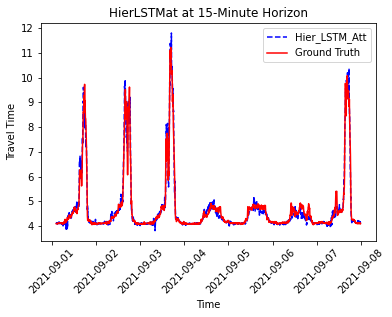

In [6]:
# visualize the above three charts in one
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-09-01"
end_date = "2021-09-07"
route_col = "Route_3"

ground_truth = ground_truth_15min_df.loc[start_date : end_date]
hier_LSTM_att = hier_LSTM_15min_df.loc[start_date : end_date]

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(hier_LSTM_att.index)
data_df['Travel Time'] = hier_LSTM_att[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Hier_LSTM_Att", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('HierLSTMat at 15-Minute Horizon')

plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(md.DayLocator(interval=1)) 

plt.xticks(rotation=45)
plt.savefig("15-Minute Horizon.png", dpi=300)
plt.show()


In [ ]:
type(ground_truth.index[0])

str

In [ ]:
hier_LSTM_att[route_col]

timestamp
2021-10-01 00:00:00    4.158668
2021-10-01 00:05:00    4.164528
2021-10-01 00:10:00    4.180936
2021-10-01 00:15:00    4.128893
2021-10-01 00:20:00    4.149330
                         ...   
2021-10-08 23:35:00    4.275084
2021-10-08 23:40:00    4.270939
2021-10-08 23:45:00    4.204118
2021-10-08 23:50:00    4.174812
2021-10-08 23:55:00    4.113497
Name: Route_3, Length: 2304, dtype: float64

# 30 Minute Plot

In [3]:
stacked_LSTM_30min_df = pd.read_csv(stacked_LSTM_30min_file_path)
hier_LSTM_30min_df = pd.read_csv(hier_LSTM_30min_file_path)
stacked_LSTM_att_30min_df = pd.read_csv(stacked_LSTM_att_30min_file_path)
ground_truth_30min_df = pd.read_csv(ground_truth_30min_file_path)

stacked_LSTM_30min_df = stacked_LSTM_30min_df.set_index(pd.DatetimeIndex(stacked_LSTM_30min_df['timestamp']))
hier_LSTM_30min_df = hier_LSTM_30min_df.set_index(pd.DatetimeIndex(hier_LSTM_30min_df['timestamp']))
stacked_LSTM_att_30min_df = stacked_LSTM_att_30min_df.set_index(pd.DatetimeIndex(stacked_LSTM_att_30min_df['timestamp']))
ground_truth_30min_df = ground_truth_30min_df.set_index(pd.DatetimeIndex(ground_truth_30min_df['timestamp']))

In [4]:
start_date = pd.to_datetime("2021-10-01")
end_date = pd.to_datetime("2021-10-07")
travel_time_column = "travel_time_0"

ground_truth = ground_truth_30min_df.loc["2021-10-01":"2021-10-07"]
stacked_LSTM = stacked_LSTM_30min_df.loc["2021-10-01":"2021-10-08"]
hier_LSTM_att = hier_LSTM_30min_df.loc["2021-10-01":"2021-10-07"]
stacked_LSTM_att = stacked_LSTM_att_30min_df.loc["2021-10-01":"2021-10-08"]

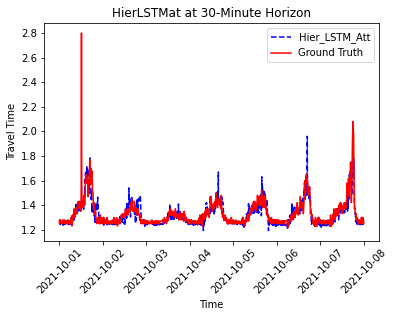

In [5]:
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-10-01"
end_date = "2021-10-07"
route_col = "Route_5"

ground_truth = ground_truth_30min_df.loc[start_date : end_date]
hier_LSTM_att = hier_LSTM_30min_df.loc[start_date : end_date]

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(hier_LSTM_att.index)
data_df['Travel Time'] = hier_LSTM_att[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

# formatter = md.DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(formatter)
# locator = md.DayLocator()
# ax.xaxis.set_major_locator(locator)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Hier_LSTM_Att", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('HierLSTMat at 30-Minute Horizon')

plt.xticks(rotation=45)
plt.savefig("30-Minute Horizon.png", dpi=300)
plt.show()


# 45 Minutes Plot

In [3]:
stacked_LSTM_45min_df = pd.read_csv(stacked_LSTM_45min_file_path)
hier_LSTM_45min_df = pd.read_csv(hier_LSTM_45min_file_path)
stacked_LSTM_att_45min_df = pd.read_csv(stacked_LSTM_att_45min_file_path)
ground_truth_45min_df = pd.read_csv(ground_truth_45min_file_path)

stacked_LSTM_45min_df = stacked_LSTM_45min_df.set_index(pd.DatetimeIndex(stacked_LSTM_45min_df['timestamp']))
hier_LSTM_45min_df = hier_LSTM_45min_df.set_index(pd.DatetimeIndex(hier_LSTM_45min_df['timestamp']))
stacked_LSTM_att_45min_df = stacked_LSTM_att_45min_df.set_index(pd.DatetimeIndex(stacked_LSTM_att_45min_df['timestamp']))
ground_truth_45min_df = ground_truth_45min_df.set_index(pd.DatetimeIndex(ground_truth_45min_df['timestamp']))

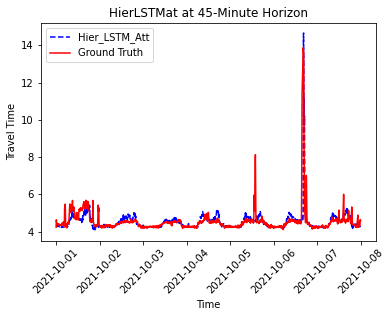

In [4]:
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker

start_date = "2021-10-01"
end_date = "2021-10-07"
route_col = "Route_12"

ground_truth = ground_truth_45min_df.loc[start_date : end_date]
hier_LSTM_att = hier_LSTM_45min_df.loc[start_date : end_date]

# ax = plt.gca()
# ground_truth.plot(kind = 'line', y = route_col, color = 'red',ax = ax, label='Groud Truth')
# # stacked_LSTM.plot(kind = 'line', y = route_col, color = 'green',ax = ax, label='Stacked_LSTM')
# hier_LSTM_att.plot(kind = 'line', y = route_col, color = 'cyan',ax = ax,label='Hier_LSTM_att')
# # stacked_LSTM_att.plot(kind = 'line', y = route_col, color = 'blue',ax = ax,label='Stacked_LSTM_att')

# ticklabels = np.unique(hier_LSTM_att.index.strftime('%Y-%m-%d'))
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# plt.show()

data_df = pd.DataFrame()
data_df['Time'] = pd.to_datetime(hier_LSTM_att.index)
data_df['Travel Time'] = hier_LSTM_att[[route_col]].to_numpy()

gt_data_df = pd.DataFrame()
gt_data_df['Time'] = pd.to_datetime(ground_truth.index)
gt_data_df['Travel Time'] = ground_truth[[route_col]].to_numpy()

# plotting
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 17)

# formatter = md.DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(formatter)
# locator = md.DayLocator()
# ax.xaxis.set_major_locator(locator)

sns.lineplot(x='Time', y='Travel Time', data=data_df, color="blue", label="Hier_LSTM_Att", linestyle="--")
sns.lineplot(x='Time', y='Travel Time', data=gt_data_df, color="red", label="Ground Truth", linestyle="-")

ax.legend()
ax.set_title('HierLSTMat at 45-Minute Horizon')

# ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(md.DayLocator(interval=1)) 

plt.xticks(rotation=45)
plt.savefig("45-Minute Horizon.png", dpi=300)
plt.show()
